## Downloading data from online repositories - White Island 2019/2016 events

In [1]:
from obspy.clients.fdsn import Client
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

client = Client("GEONET")

Initially we will set our time period that we are proposing to observe. 

2019 event: The White Island (whakaari) volcano erupted on the 9th of December 2019 at 14:11 NZDT (01:11 UTC).

2016 event: The White Island (whakaari) volcano erupted on the 27th of April 2016 at 22:36 NZDT (09:36 UTC).
a phreatic eruption occurred on Whakaari Island (White Island) producing an eruption sequence that contained multiple eruptive pulses determined to have occurred over the first 30 min, with a continuing tremor signal lasting ~ 2 h after the pulsing sequence. 

In Obspy, when downloading and handling data it is important to note that times are manages using a class called UTCDateTime.

In [2]:
from obspy import UTCDateTime

time = UTCDateTime("2019-12-09T01:11:0.0") #time of eruption recoreded 01:11 UTC, on 9 December 2019, a short-lived eruption began, lasting only 1 to 2 min.
print(time)

#time = UTCDateTime("2016-03-27T09:36:0.0")
#print(time)

starttime = time - 60*60*(24-12)*1 
print(starttime)

endtime = time + 60*60*(2)*1.0
print(endtime)

2019-12-09T01:11:00.000000Z
2019-12-08T13:11:00.000000Z
2019-12-09T03:11:00.000000Z


Establish what stations, that are members of the station service of the FDSN client, GEONET,  are within the specified maximum number of degrees, in this case 1, of the longitude and latitude coordinates of a selected point at the centre of whakarri.

In [3]:
#White Island Details
point_long = 177.1811
point_lat = -37.5193

inventory = client.get_stations(latitude=point_lat,
                                longitude=point_long,
                                maxradius=1.0,
                                #channel="HHZ", #Select one or more SEED channel codes. Multiple codes are comma-separated.
                                level="channel",
                                starttime = starttime,
                                endtime = endtime)
print(inventory)

Inventory created at 2022-09-23T03:25:31.000000Z
	Created by: Delta
		    
	Sending institution: GeoNet (WEL(GNS_Test))
	Contains:
		Networks (1):
			NZ
		Stations (33):
			NZ.EDRZ (Edgecumbe)
			NZ.HAZ (Te Kaha)
			NZ.HLRZ (Highlands Station)
			NZ.KAFS (Kawerau Fire Station)
			NZ.KARZ (Kaharoa)
			NZ.LIRZ (Lichenstein Road)
			NZ.LOTT (East Cape)
			NZ.MARZ (Manawahe)
			NZ.MKRZ (Makatiti)
			NZ.MWFS (Matata Watchorn Farm)
			NZ.MWZ (Matawai)
			NZ.MXZ (Matakaoa Point)
			NZ.MYRZ (Mayor Island)
			NZ.NGRZ (Ngongotaha)
			NZ.OMRZ (Omania)
			NZ.OPCS (Opotiki College)
			NZ.OPRZ (Ohinepanea)
			NZ.PKGZ (Pakihiroa)
			NZ.RAGZ (Rawiri)
			NZ.ROTS (Rotorua District Council)
			NZ.RRRZ (Republican Road)
			NZ.RUGZ (Raukumara Range)
			NZ.TARZ (Mount Tarawera)
			NZ.TAUT (Tauranga)
			NZ.TBCS (Tauranga Boys College)
			NZ.TDHS (Te Araroa District High School)
			NZ.TGRZ (Tauranga)
			NZ.TWGZ (Tauwhareparae)
			NZ.URZ (Urewera)
			NZ.WHRZ (Whale Island)
			NZ.WIZ (White Island)
			NZ.WKHS (

/home/patrick/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


Looking at the list above the station that appear to make the most sense to study would be:

- NZ.WIZ (White Island)
- NZ.WSRZ (White Island Summit)

In [4]:
net = "NZ"
sta = "WIZ"
loc = "10"
chan = "HH*"

To actually download the data, we can use an Obspy function called get_waveforms. All it requires is the network, station, location, channel, and start time and end time, which we already defined!

3 Trace(s) in Stream:
NZ.WIZ.10.HHE | 2019-12-08T13:11:00.003134Z - 2019-12-09T03:11:00.003134Z | 100.0 Hz, 5040001 samples
NZ.WIZ.10.HHN | 2019-12-08T13:11:00.003134Z - 2019-12-09T03:11:00.003134Z | 100.0 Hz, 5040001 samples
NZ.WIZ.10.HHZ | 2019-12-08T13:11:00.003134Z - 2019-12-09T03:11:00.003134Z | 100.0 Hz, 5040001 samples


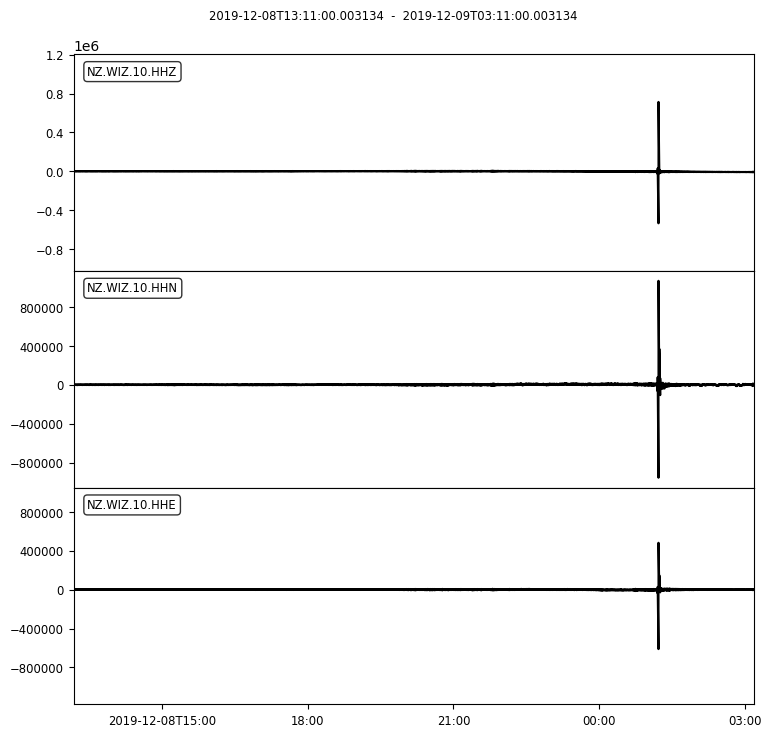

In [5]:
st = client.get_waveforms(net, sta, loc, chan, starttime, endtime)
print(st)
st.plot();
st.plot(outfile = 'Seismic_data_channels.jpg');

In [6]:
data = st[0].data
times = st[0].times()

print(len(data))
print(len(times))

#Convert to List

data_list = data.tolist()
times_list = times.tolist()

#Convert to Dataframe

df = pd.DataFrame(list(zip(data_list,times_list)),
                  columns= ['Data', 'Times'])

#save to .csv file

df.to_csv('WhiteIsland_2019_Raw_data.csv', index=False)

5040001
5040001


## Removing instrument response

In [7]:
time = time
starttime = starttime
endtime = endtime

net = net
sta = sta
loc = loc
chan = "HHZ"

In order to include the instrument response when downloading the data, all that is required to do is add one option when we use get_waveforms:

1 Trace(s) in Stream:
NZ.WIZ.10.HHZ | 2019-12-08T13:11:00.003134Z - 2019-12-09T03:11:00.003134Z | 100.0 Hz, 5040001 samples


/home/patrick/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


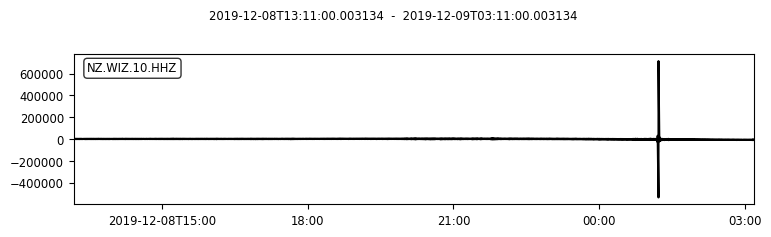

In [8]:
st = client.get_waveforms(net, sta, loc, chan, starttime, endtime, attach_response = True)
print(st)
st.plot();

It doesn't look any different yet, but the responses have been downloaded. Before removing the response, we will copy the data. This is because the function remove_response acts directly on the data, and will overwrite the original. Copying a stream can be done as shown below:

In [9]:
st_rem = st.copy()
print(st)
print(st_rem)

1 Trace(s) in Stream:
NZ.WIZ.10.HHZ | 2019-12-08T13:11:00.003134Z - 2019-12-09T03:11:00.003134Z | 100.0 Hz, 5040001 samples
1 Trace(s) in Stream:
NZ.WIZ.10.HHZ | 2019-12-08T13:11:00.003134Z - 2019-12-09T03:11:00.003134Z | 100.0 Hz, 5040001 samples


Now we can remove the response. We simply  set which units that the ground motion is to be represented in using the output option.

Because data is inherently noisy, when you divide the data by the response at low and high frequencies, you end up amplifying the noise. This is why bandpass filtering is commonly done as part of the response removal process. This is particularly important if you're using an instrument that may not have a flat response at such a range of frequencies as this broadband GSN sensor does.

It is possible to visualize what is happening in the response removal process by using the plot = True option in the remove_response function. This is what it looks like if we don't do any kind of filtering, and if you choose to use filters, the different plots will show what happens in each step. How to choose an appropriate filter for your interest is tricky, and for the sake of this study has been ignored!

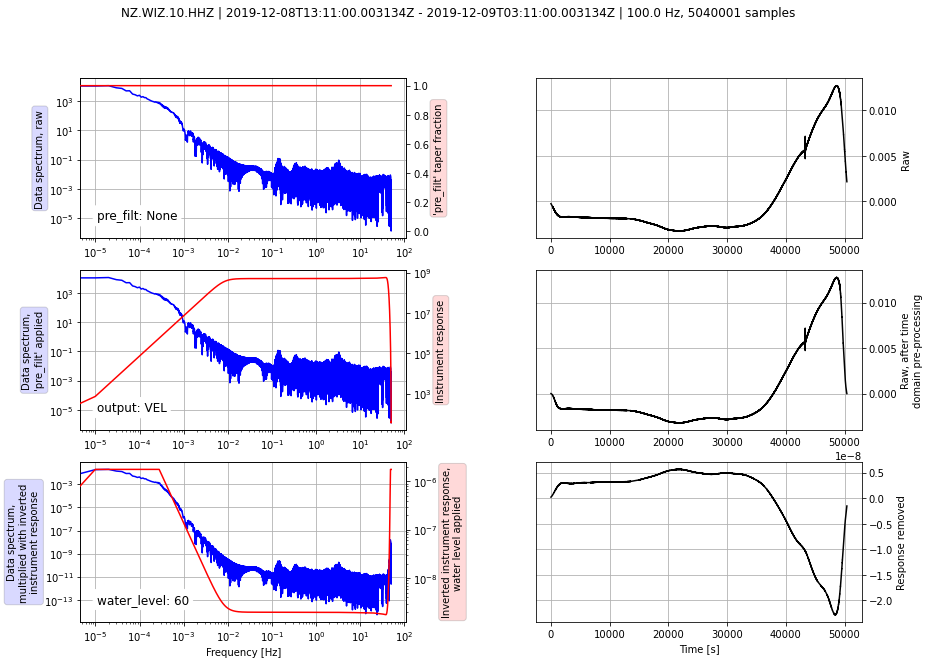

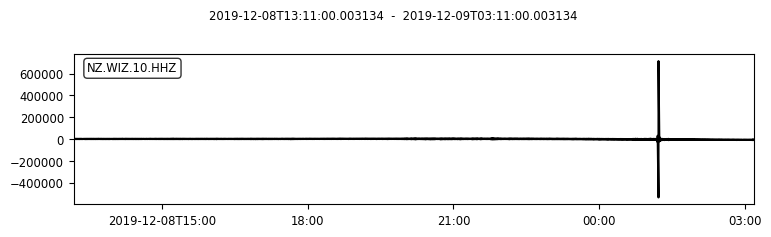

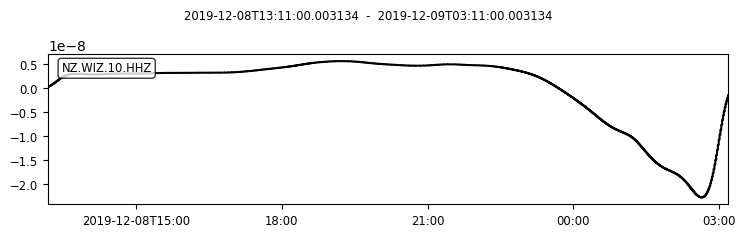

In [31]:
st_rem.remove_response(output = 'VEL',, plot = True) # other options: output = 'DISP', 'ACC'

st.plot()
st.plot(outfile='White_Island_2019_Raw.png');
st_rem.plot()
st_rem.plot(outfile='White_Island_2019_Response_Removal.png');

# Remember, if you run this cell multiple times, your output will be strange because you already removed the
# response from st_rem. If you want to do it again and try something else, you either have to make a new copy
# of the original st again, or go back and re-run the previous cell that copied st.

As a reault the seismic data is now in a form wherethe instrument response has been removed, so in this case we now know we're working in units of velocity (m/s) for the ground motion. This is what it looks like now:

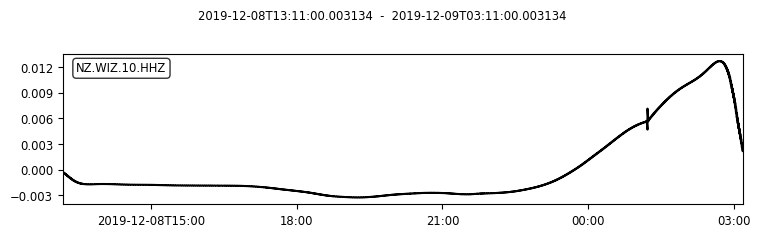

In [11]:
st_rem.plot();

## Some Stream and Trace Methods

### Detrending

The purpose of Detrending data is so that the user removes an aspect from the data that is possibly causing some kind of distortion. For example, in a dataset that shows an overall increasing trend detrending the data would enable the user to see subtrends.

In [12]:
st_detrend = st_rem.copy()

st_detrend.detrend(type='simple')

st_detrend.plot(outfile='White_Island_2019_Detrending.png');



### Filtering

The purpose of applying a seismic filter is so that the user can observe at a specific frequency range of data. This would be helpful in identifying large earth movements that would be indicative of earthquakes or volcanoes. There exists many different filter methods including: 

1. bandpass
2. bandstop
3. lowpass
4. highpass
5. lowpass_cheby_2
6. lowpass_fir (experimental)
7. remez_fir (experimental)

Information about all of these options can be found in the Obspy documentation [here](https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.filter.html#obspy.core.stream.Stream.filter). For each filter, a frequency or frequencies is to be specified depending on the type of filter used.

Similar to remove_response, the filtering operation is performed on the original data, so a copy of your stream is made first in order to retain a copy of the unfiltered data.

In the case of this study we will only use a highpass filter. A highpass filter is a filter that passes signals from a selected sample with a frequency higher than a selected frequency cut-off. The signals with a frequency lower than the selected cut-off will be attenuated

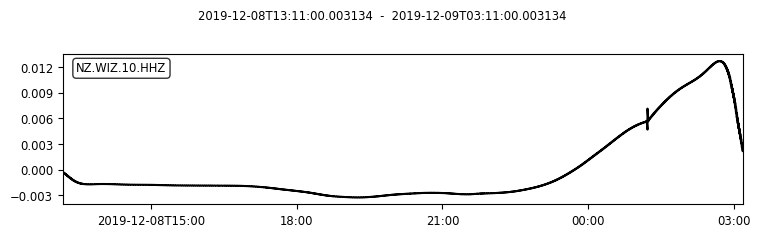

In [13]:
st_filt = st_rem.copy()

st_filt.filter("highpass", freq=3.0)
#st_filt.filter("bandpass", freqmin=1.0, freqmax=20.0)

st_rem.plot()
st_filt.plot();
st_filt.plot(outfile='White_Island_2019_Filtering.png');

### Changing sampling rates

There are three methods in Obspy for changing the sampling rates of data in a stream or trace:

1. [Decimate](https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.decimate.html#obspy.core.stream.Stream.decimate): downsamples data by an integer factor
2. [Interpolate](https://docs.obspy.org/packages/autogen/obspy.core.trace.Trace.interpolate.html#obspy.core.trace.Trace.interpolate): increase sampling rate by interpolating (many method options)
3. [Resample](https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.resample.html#obspy.core.stream.Stream.resample): resamples data using a Fourier method

In the case of this study we will only use the decimate method. Decimation can be described as follows, if you preform decimation by a factor of 10 on your data this means that you are keeping only every tenth sample. This factor multiplies the sampling interval or, equivalently, divides the sampling rate.

Again, this operation acts on the original data, a copy will be saved in order to keep a version of the data with its original sampling rate.

The original sampling rate of the data can be checked in the stats of the data. Knowing the original sampling rate will inform the descison as to what factor to decimate by.

In [14]:
st_filt[0].stats.sampling_rate

100.0

The original sampling rate was 100Hz, so decimate by a factor of 2.

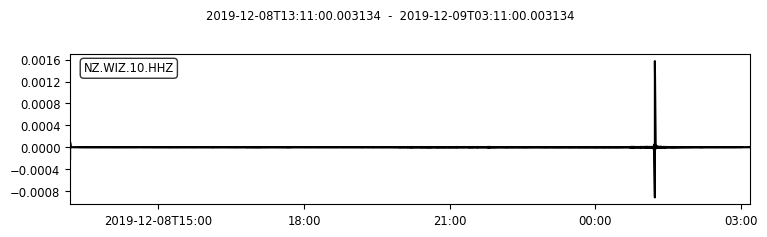

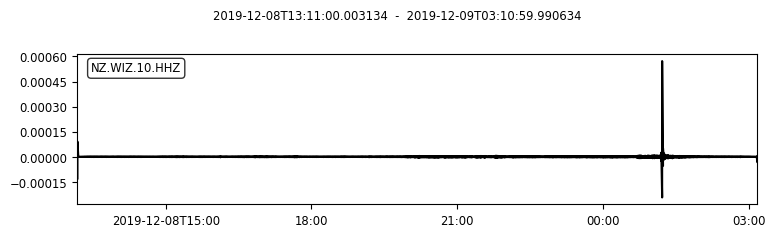

In [15]:
st_dec = st_filt.copy()

#decimate method
#st_dec.decimate(2 ,no_filter=True, strict_length=False) #Deactivate Automatic filtering, note that decimate automatically includes a lowpass filtering with corner frequency 20 Hz.

#resample method 
st_dec.resample(80, window='hanning', no_filter=True, strict_length=False) #Deactivate Automatic filtering, note that decimate automatically includes a lowpass filtering with corner frequency 20 Hz.

st_filt.plot()
st_dec.plot();
st_dec.plot(outfile='White_Island_2019_Resample.png');

It doesn't look very different, but if the stats are checked again, it is clear that the sampling rate is different! 

In [16]:
st_dec[0].stats.sampling_rate

80.0

## Writing the Data to a File

The first step that is required is separating both the data and the corresponding times. For any type of graph or plot an independent variable, which in this case is the times, and a dependant variable, in this case the ground motion records in velocity. It is quite straightforward to parse the data from the tracing stream objects.

In [17]:
data = st_dec[0].data

print(data)

[ -1.29792865e-04  -9.45476696e-05  -2.79908976e-06 ...,  -9.76960069e-07
   2.88341208e-06  -3.29937386e-05]


In [18]:
times = st_dec[0].times()

print(times)

[  0.00000000e+00   1.25000000e-02   2.50000000e-02 ...,   5.03999625e+04
   5.03999750e+04   5.03999875e+04]


Because these both come from the same data trace, the arrays should be the same length. This indicates that there is a corresponding Time value for every ground motion record.


In [19]:
print(len(data))
print(type(data))
print(len(times))
print(type(times))

4032000
<class 'numpy.ndarray'>
4032000
<class 'numpy.ndarray'>


Convert the data, which is in the form of arrays into lists. So that it is in a suitable form so that it can be added to a dataframe.

In [20]:
import numpy as np

data_list = data.tolist()
times_list = times.tolist()

print(type(data_list))
print(type(times_list))

<class 'list'>
<class 'list'>


Compile these lists into a dataframe.

In [21]:
import pandas as pd

df = pd.DataFrame(list(zip(data_list,times_list)),
                  columns= ['Data', 'Times'])

print(df)

                 Data       Times
0       -1.297929e-04      0.0000
1       -9.454767e-05      0.0125
2       -2.799090e-06      0.0250
3        4.928769e-05      0.0375
4        8.076214e-05      0.0500
...               ...         ...
4031995 -2.401038e-07  50399.9375
4031996  4.512536e-07  50399.9500
4031997 -9.769601e-07  50399.9625
4031998  2.883412e-06  50399.9750
4031999 -3.299374e-05  50399.9875

[4032000 rows x 2 columns]


So now we have to save the dataset that we have created. We save it in many format, here we are doing it in csv by using to_csv.

In [22]:
df.to_csv('WhiteIsland_2019_data.csv', index=False)


## Visualisation

### Matplotlib

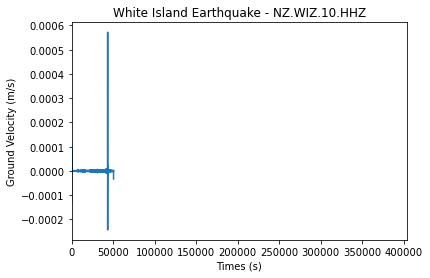

In [23]:
net = st[0].stats.network
sta = st[0].stats.station
loc = st[0].stats.location
chan = st[0].stats.channel

plt.plot(times, data)
plt.xlim(0,(len(times)/10))
plt.xlabel("Times (s)")
plt.ylabel("Ground Velocity (m/s)")
plt.title("White Island Earthquake - " + net + "." + sta + "." + loc + "." + chan);

Here is one final useful Matplotlib capability, plotting so that you have your UTC times on the x-axis, rather than just seconds from zero, using matplotlib.dates.

 When we calculate the times this time, instead of leaving the parentheses blank, we specify the "type" of times as "matplotlib" so that we can plot them in UTC time.

In [24]:
import matplotlib.dates as mdates

HHZ_data = st_filt[0].data
HHZ_times_mpl = st_filt[0].times(type = 'matplotlib')

print(len(HHZ_data))
print(len(HHZ_times_mpl))

5040001
5040001


Much of the plotting here is the same - it just incorporates another Matplotlib capability where you build your axes more manually. You can check out the documentation for this here. The basic plotting setup is as follows:

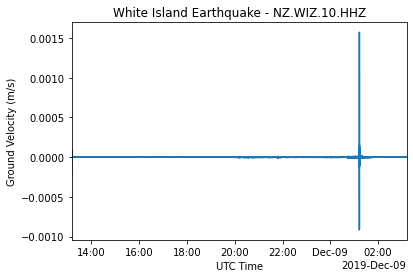

In [25]:
fig, ax = plt.subplots()

ax.plot(HHZ_times_mpl, HHZ_data)
ax.set_xlim(HHZ_times_mpl[0], HHZ_times_mpl[-1])
ax.set_xlabel("UTC Time")
ax.set_ylabel("Ground Velocity (m/s)")
ax.set_title("White Island Earthquake - " + net + "." + sta + "." + loc + "." + chan);

locator = ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(locator))

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [27]:
HHZ_times_UTC = st_filt[0].times(type = 'utcdatetime')

print(HHZ_times_UTC)
print(len(HHZ_times_UTC))

[UTCDateTime(2019, 12, 8, 13, 11, 0, 3134)
 UTCDateTime(2019, 12, 8, 13, 11, 0, 13134)
 UTCDateTime(2019, 12, 8, 13, 11, 0, 23134) ...,
 UTCDateTime(2019, 12, 9, 3, 10, 59, 983134)
 UTCDateTime(2019, 12, 9, 3, 10, 59, 993134)
 UTCDateTime(2019, 12, 9, 3, 11, 0, 3134)]
5040001


In [28]:
import pandas as pd

UTCdf = pd.DataFrame(list(zip(data_list,HHZ_times_UTC)),
                  columns= ['Data', 'UTCTimes'])

print(UTCdf)

                 Data                     UTCTimes
0       -1.297929e-04  2019-12-08T13:11:00.003134Z
1       -9.454767e-05  2019-12-08T13:11:00.013134Z
2       -2.799090e-06  2019-12-08T13:11:00.023134Z
3        4.928769e-05  2019-12-08T13:11:00.033134Z
4        8.076214e-05  2019-12-08T13:11:00.043134Z
...               ...                          ...
4031995 -2.401038e-07  2019-12-09T00:22:59.953134Z
4031996  4.512536e-07  2019-12-09T00:22:59.963134Z
4031997 -9.769601e-07  2019-12-09T00:22:59.973134Z
4031998  2.883412e-06  2019-12-09T00:22:59.983134Z
4031999 -3.299374e-05  2019-12-09T00:22:59.993134Z

[4032000 rows x 2 columns]


In [29]:
UTCdf.index = UTCdf['UTCTimes'] #make Time the index row of the dataframe
UTCdf.pop('UTCTimes') #drop the original times column
UTCdf[0::100]

,Data
UTCTimes,
2019-12-08T13:11:00.003134Z,-1.297929e-04
2019-12-08T13:11:01.003134Z,-1.149545e-08
2019-12-08T13:11:02.003134Z,4.517747e-09
2019-12-08T13:11:03.003134Z,2.678786e-09
2019-12-08T13:11:04.003134Z,2.371603e-10
...,...
2019-12-09T00:22:55.003134Z,2.025912e-09
2019-12-09T00:22:56.003134Z,-1.000002e-09
2019-12-09T00:22:57.003134Z,-1.234154e-09


In [30]:
#results = seasonal_decompose(df.asfreq('s'), model='additive')
#results.plot();

ValueError: This function does not handle missing values

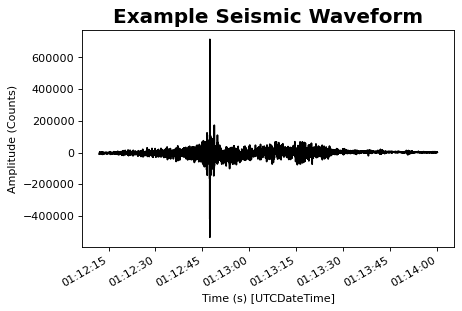

In [6]:
import matplotlib.pyplot as plt
from obspy import read

net = "NZ"
sta = "WIZ"
loc = "10"
chan = 'HHZ'
starttime = time + 60*1.2 
endtime = time + 60*3

st = client.get_waveforms(net, sta, loc, chan, starttime, endtime)

tr = st[0]

fig = plt.figure( dpi=80)
ax = fig.add_subplot(1, 1, 1)
ax.plot(tr.times("matplotlib"), tr.data, color="black")
ax.xaxis_date()
fig.autofmt_xdate()
ax.set_xlabel('Time (s) [UTCDateTime]')
ax.set_ylabel('Amplitude (Counts)')
plt.title('Example Seismic Waveform', fontsize='18', fontweight='bold')
plt.show()


fig.savefig('Seismic_data_Example.png')
